# Ch. 1 Regular Expressions and word Tokenization
## What is Natural Language Processing?
- field of study focused on making sense of language using statistics and computers
- basics of NLP
    - Topic Identification
    - Text Classification
- NLP Applications
    - Chatbots
    - Translation
    - Sentiment Analysis
    
## Regular Expressions
- strings with a special syntax
- allow us to match patterns in other strings
- Applications
    - find links in a webpage
    - parse email addresses
    - remove/replace unwanted characters
- Import regex library in python
    - import re
- Common Regex Patterns
    - \w+ 
        - used to match words
    - \d 
        - used to match digits
    - \s
        - matches spaces
    - .*
        - wildcard, matches any letter or symbol
    - + or *
        - greedy match, grabbing repeats of single letters or whole patterns
        - adding + after \w matches the full word rather than first character
    - Using these character classes as capital letters negates them
        - \S will match anything that is not a space
    - [a-z]
        - lowercase group of characters
        - ex ['abcdef']

Python's re module
- re: module
- split: split a string on regex
- findall: find all patterns in a string
- search: search for a pattern. does not have to match at the beginning of the string
- match: match an entire string or substring based on a pattern
- When using re module, pass the pattern first, and the string second

In [1]:
import re

re.split('\s+', 'Split on Spaces')

['Split', 'on', 'Spaces']

In [2]:
my_string = "Let's write RegEx!"
re.findall('\w+', my_string)

['Let', 's', 'write', 'RegEx']

In [3]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


## Intro to Tokenization
- Turning a string or document into tokens (smaller chunks)
- One step in preparing a text for NLP
- many different theories and rules for tokenization
- you can create your own rules using regular expressions
- Examples
    - breaking out words or sentences
    - separating punctuation
    - separating out hashtags in a tweet
- nltk is a common library for tokenization
    - Natural Language Tookkit (nltk)

In [4]:
import nltk
from nltk.tokenize import word_tokenize
word_tokenize('Hi there!')

['Hi', 'there', '!']

### Why tokenize?
- easier to map part of speech
- matching common words
- removing unwanted tokens such as common words or repeated words
- Other nltk tokenizers
    - sent_tokenize: tokenize a document into sentences
    - regexp_tokenize: tokenize a string or document based on a regular expression pattern. Allows more granular control over the process
    - TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions, and lots of exclamation points

### More Regex Practice
- Differnce between re.search() and re.match()
    - match starts at the beginning of the string to look for a match until it cannot match any longer
        - use to be specific about composition of entire string, or at least the beginning
        - re.match('abc', 'abcde') = 'abc'
    - search looks for the pattern at any point in the string, not just the beginning
        - use to find pattern that may not be at the beginning of a string
        - re.search('abd', '123abcde = 'abc'
    

In [5]:
# Import necessary modules
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

with open('scene_one.txt') as f:
    scene_one = f.read()

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'eisrequiem', 'valleys', 'cart', 'See', 'four', 'Make', 'Leaving', 'behaviour', 'known', 'cross', 'KNIGHT', 'well', 'Since', 'ptoo', 'uh', 'Said', 'vital', 'SCENE', 'bells', 'orangutans', 'carrying', 'creep', 'Charge', 'Aaaaaaaaah', 'compared', 'lady', 'pig', 'Follow', 'Skip', 'everything', 'why', 'accomplished', 'had', 'together', 'tops', 'down', 'would', 'aside', "'Here", 'Listen', 'without', 'logically', 'THE', 'sniff', 'pray', 'lobbed', 'mercy', 'bugger-folk', 'dear', 'soon', 'Princess', 'Say', 'cut', 'PIGLET', 'Dingo', 'bottom', 'sex', 'biggest', 'things', 'honored', 'carve', 'castle', 'rocks', 'soiled', 'how', 'spirit', 'curtains', 'drink', 'language', 'with', 'out', 'worry', 'swallow', 'meeting', 'Hooray', 'nibble', 'rhymes', 'follow', 'Chapter', 'ARTHUR', 'Oooh', 'brought', 'set', 'minute', 'lovely', 'visually', 'case', 'islands', 'Just', 'between', 'explain', 'enough', 'God', 'risk', 'VILLAGER', 'praised', 'knew', 'Quickly', 'g', 'economic', 'dare', 'about', 'quack', 'footwor

In [6]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [7]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<re.Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [8]:
# Find the script notation at the beginning of the fourth sentence and print it
sentences = sent_tokenize(scene_one)
pattern2 = r"[\w+\s+]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


## Advanced Tokenization with Regex
### Regex using or "|"
- OR is represented using the pipe character |
- define a group using ()
- you can define explicit character ranges using []

In [9]:
import re
match_digits_and_words = ('(\d+|\w+)')
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

In [10]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"
from nltk import regexp_tokenize

regexp_tokenize(my_string, r"(\w+|#\d|\?|!)")

['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [11]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"
# Use the pattern on the first tweet in the tweets list
hashtags = regexp_tokenize(tweets[0], pattern1)
print('hashtas: ',hashtags)

# Write a pattern that matches both mentions (@) and hashtags
pattern2 = r"([@|#]\w+)"
# Use the pattern on the last tweet in the tweets list
mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print('mentions/hashtags: ',mentions_hashtags)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print('TweetTokenizer: ',all_tokens)

hashtas:  ['#nlp', '#python']
mentions/hashtags:  ['@datacamp', '#nlp', '#python']
TweetTokenizer:  [['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


#### Non-ascii Tokenization

In [12]:
from nltk.tokenize import regexp_tokenize, word_tokenize
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']
['Wann', 'Pizza', 'Und', 'Über']
['🍕', '🚕']


## Charting word length with nltk
#### Chart the length of each line in scene one by word count

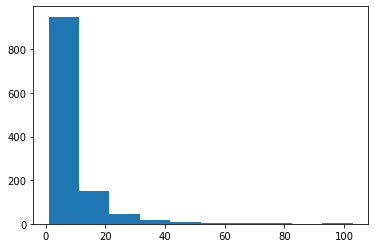

In [13]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Split the script into lines: lines
lines = scene_one.split('\n')

# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

# Ch. 2 Simple Topic Identification
## Word Counts with bag-of-words
- bag-of-words is a simple and basic method for finding topics in a text sample
- Need to first create tokens using tokenization and then count up all the tokens
- The more frequent a word, the more important it might be to the theme of the text
- bag-of-words can be a great way to determine the significant words in a text based on the frequency

In [14]:
from nltk.tokenize import word_tokenize
from collections import Counter

counter = Counter(word_tokenize('The cat is in the box. The cat box.'))
counter.most_common(3)

[('The', 2), ('cat', 2), ('box', 2)]

### Building a Counter with bag-of-words

In [15]:
with open('wiki_text_debugging.txt') as f:
    article = f.read()

# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 66), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


## Simple Text Preprocessing
Why Preprocess?
- Helps for better input data when performing machine learning or other statistical methods
- examples
    - tokenization to create a bag of words
    - lowercasing words to avoid duplicates due to case
- Lemmatization/Stemming: shortening words to their root or stem words
- Removing stop words (and or the), punctuation, or unwanted tokens 

## Text Preprocessing with Python

In [16]:
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords

text = 'The cat is in the box. The cat likes the box. The cat likes the box.'

# Tokenize using a list comprehension
# isalpha returns True if the token is alphabetical. Used to filter our numbers and punctuation
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]

# Filter out stopwords
no_stops = [t for t in tokens if t not in stopwords.words('english')]

# Create counter
Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

### Text preprocessing practice
Remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

In [17]:
# Imports
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

# Read in Text
with open('wiki_text_debugging.txt') as f:
    article = f.read()
    
# Tokenize in lowercase
lower_tokens = [w for w in word_tokenize(article.lower())]

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('debugging', 40), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


## Gensim
- Popular open-source NLP library
- Uses top academic models to perform complex tasks
    - building documents or word vectors
    - performing topic identification and document comparison

### Creating and querying a corpus with gensim

In [18]:
# Imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# create a list of files to parse
wiki_titles = ['wiki_text_bug.txt', 'wiki_text_computer.txt', 'wiki_text_crash.txt', 'wiki_text_debugger.txt',
               'wiki_text_debugging.txt', 'wiki_text_exception.txt', 'wiki_text_hopper.txt', 'wiki_text_language.txt', 
               'wiki_text_malware.txt', 'wiki_text_program.txt', 'wiki_text_reversing.txt', 'wiki_text_software.txt', ]

# Create list to store document tokens in
articles = []

# Loop through articles and store tokens as a list in articles
for wt in wiki_titles:
    # Read in Text
    with open(wt, encoding='UTF-8') as f:
        text = f.read()

    # Tokenize in lowercase
    lower_tokens = [w for w in word_tokenize(text.lower())]

    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    
    # Add preprocessed tokens to articles
    articles.append(no_stops)

In [19]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

computer
[(1, 1), (13, 1), (15, 1), (18, 1), (26, 1), (29, 1), (37, 1), (38, 4), (47, 2), (48, 7)]


In [20]:
from collections import defaultdict
import itertools

# Save the fifth document: doc
doc = corpus[0]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
print('Top 5 for doc:')
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
    
# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
print('\nTop 5 overall:')
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

Top 5 for doc:
bug 66
bugs 60
software 55
may 45
computer 38

Top 5 overall:
computer 598
software 450
cite 322
ref 259
code 235


## Tf-idf with gensim
Term frequency - inverse document frequency
- Allows you to determine the most important words in each document
- Each corpus may have shared words beyond common stopwords
- These words should be down-weighted in importance 
- Ensures the most common words accross the corpus don't show up as keywords
- Keeps document specific words weighted high, while common words across the whole corpus are weighted low

In [21]:
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Assign a corpus to doc
doc = corpus[0]

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

priority 0.3415630199292239
severity 0.29886764243807085
releases 0.19212919871018844
bug 0.1631163587170805
bugs 0.14828759883370954


# Ch. 3 Name Entity Recognition (NER)
- NLP task to identify important named entities in the text
- people, places, organizations
- Dates, states, works of art
- and many other categories depending on the library and notation used
- Can be used alongside topic identification
- or on its own to answer questions such as who, what, when, and where

In [22]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

with open('uber_apple.txt', encoding='UTF-8') as f:
    article = f.read()
    
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


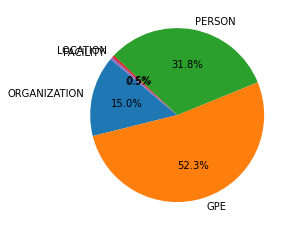

In [23]:
from collections import defaultdict
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

with open('articles.txt', encoding='UTF-8') as f:
    articles = f.read()

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(articles)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.show()

## Introduction to SpaCy
- NLP Library similar to gensim, but with different implementations
- focus on creating NLP pipelines to generate models and corpora
- open source with extra libraries and tools
    - Displacy: visualization tool for viewing parse trees which uses nodejs to create interactive text

### Why use SpaCy for NER?
- Easy pipeline creation
- Different Entity types compared to nltk
- informal language corpora
    - easily find entites in Tweets and chat messages
- Quickly growing and having new languages/tools added

In [26]:
with open('uber_apple.txt', encoding='UTF-8') as f:
    article = f.read()

# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm',tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG unroll.me
ORG Apple
PERSON Uber
FAC Travis Kalanick of Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


## Multilingual NER with polyglot
- NLP that uses word vectors
- Why polyglot?
    - vectors for many languages
    - more than 130 languages
    - can use for transliteration/translation

# Ch. 4 Building a "Fake News" Classfier
## Supervised Learning with NLP
- need to use language to classify observations
- how to create supervised learning data from text?
    - bag of words 
    - tf-idf 

Supervised Learning Process
- collect and preprocess data
- determine a label
- split data into training and testing
- extract features from text to predict the label
- evaluate model using test data

### Building word count vectors with scikit-learn


In [31]:
# Import data
df = pd.read_csv('fake_or_real_news.csv', encoding='UTF-8')

# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Create a series to store the labels (y) and text (X)
y = df['label']
X = df['text']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [33]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    

### Training and testing with CountVectorizer

In [37]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)


0.893352462936394
[[ 865  143]
 [  80 1003]]


### Training and testing with TfidfVectorizer

In [40]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

0.8565279770444764
[[ 739  269]
 [  31 1052]]


## Simple NLP, complex problems

In [43]:
import numpy as np 

# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684



C:\Users\16084\anaconda3\envs\python_ML\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [44]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]
REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'st

C:\Users\16084\anaconda3\envs\python_ML\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
